In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('../data.csv')
df.head(10)

,program,title,reporter,link,upvotes,bounty,vuln_type,substate,severity,asset_type,submitted_at,disclosed_at
0,curl,libcurl FTP path normalization flaw allows dec...,ahn0x,https://hackerone.com/reports/3418861,3,0.0,Path Traversal,not-applicable,high,SOURCE_CODE,2025-11-10T19:43:52.136Z,2025-11-11T16:16:19.274Z
1,curl,Hash exposed in public repository,skymander,https://hackerone.com/reports/3419617,1,0.0,Exposed Dangerous Method or Function,not-applicable,none,SOURCE_CODE,2025-11-11T15:55:41.651Z,2025-11-11T16:15:18.224Z
2,Basecamp,Two click Account Takeover,fr4via,https://hackerone.com/reports/3079738,32,hidden,Deserialization of Untrusted Data,resolved,high,GOOGLE_PLAY_APP_ID,2025-04-06T11:02:58.114Z,2025-11-11T09:14:15.992Z
3,curl,Command Injection - CRITICISM,tomar-re,https://hackerone.com/reports/3418760,2,0.0,Command Injection - Generic,not-applicable,NaN,SOURCE_CODE,2025-11-10T17:36:37.178Z,2025-11-11T06:41:11.456Z
4,curl,Silent TLS Trust Model Hijacking via `CURL_CA_...,rootsecret3,https://hackerone.com/reports/3418776,2,0.0,Improper Certificate Validation,not-applicable,critical,SOURCE_CODE,2025-11-10T18:04:42.460Z,2025-11-11T06:40:53.061Z
5,curl,Arbitrary Configuration File Inclusion: via Ex...,rootsecret3,https://hackerone.com/reports/3418646,5,0.0,External Control of File Name or Path,not-applicable,critical,SOURCE_CODE,2025-11-10T15:55:21.428Z,2025-11-10T16:21:14.255Z
6,curl,SMTP CRLF Injection in curl/libcurl via MAIL F...,haider790h,https://hackerone.com/reports/3418616,5,0.0,NaN,not-applicable,critical,SOURCE_CODE,2025-11-10T15:11:32.009Z,2025-11-10T15:50:35.520Z
7,curl,libcurl MQTT `CURLOPT_POSTFIELDSIZE_LARGE` ove...,jiyong,https://hackerone.com/reports/3417428,4,0.0,Integer Overflow,informative,medium,SOURCE_CODE,2025-11-09T05:51:21.431Z,2025-11-10T15:00:34.669Z
8,curl,Unsafe use of strcpy in Curl_ldap_err2string (...,biswarup_das,https://hackerone.com/reports/3418528,0,0.0,Classic Buffer Overflow,spam,medium,SOURCE_CODE,2025-11-10T13:36:43.005Z,2025-11-10T14:06:08.952Z
9,curl,SMTP CRLF Command Injection in CURLOPT_MAIL_FR...,bau1u,https://hackerone.com/reports/3414088,0,0.0,CRLF Injection,duplicate,medium,SOURCE_CODE,2025-11-06T12:07:44.346Z,2025-11-10T10:39:03.641Z


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   program       10041 non-null  object
 1   title         10041 non-null  object
 2   reporter      10040 non-null  object
 3   link          10041 non-null  object
 4   upvotes       10041 non-null  int64 
 5   bounty        10041 non-null  object
 6   vuln_type     9094 non-null   object
 7   substate      10040 non-null  object
 8   severity      8687 non-null   object
 9   asset_type    6353 non-null   object
 10  submitted_at  10040 non-null  object
 11  disclosed_at  10040 non-null  object
dtypes: int64(1), object(11)
memory usage: 941.5+ KB


In [131]:
df[df['title'].isna()]

,program,title,reporter,link,upvotes,bounty,vuln_type,substate,severity,asset_type,submitted_at,disclosed_at


## Preprocessing

In [132]:
# Remove data that has the title missing (all other fields are missing too)
df = df.dropna(subset=['title'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   program       10041 non-null  object
 1   title         10041 non-null  object
 2   reporter      10040 non-null  object
 3   link          10041 non-null  object
 4   upvotes       10041 non-null  int64 
 5   bounty        10041 non-null  object
 6   vuln_type     9094 non-null   object
 7   substate      10040 non-null  object
 8   severity      8687 non-null   object
 9   asset_type    6353 non-null   object
 10  submitted_at  10040 non-null  object
 11  disclosed_at  10040 non-null  object
dtypes: int64(1), object(11)
memory usage: 941.5+ KB


### Substate

In [133]:
df['substate'].value_counts()

substate
resolved          8635
informative        750
not-applicable     379
duplicate          246
spam                30
Name: count, dtype: int64

In [134]:
df['substate'].isna().count()

np.int64(10041)

In [135]:
valid_reports = df[df['substate'].isin(['informative', 'resolved'])]
print(f"Percentage of invalid (N/A / duplicate / spam / missing substate) reports: {(len(df) - len(valid_reports)) / len(df) * 100:.2f}%")
print(f"Percentage of informative reports: {len(df[df['substate'] == 'informative']) / len(df) * 100:.2f}%")

Percentage of invalid (N/A / duplicate / spam / missing substate) reports: 6.53%
Percentage of informative reports: 7.47%


In [136]:
# Remove invalid reports
df = df[df['substate'].isin(['informative', 'resolved'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9385 entries, 2 to 10040
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   program       9385 non-null   object
 1   title         9385 non-null   object
 2   reporter      9385 non-null   object
 3   link          9385 non-null   object
 4   upvotes       9385 non-null   int64 
 5   bounty        9385 non-null   object
 6   vuln_type     8539 non-null   object
 7   substate      9385 non-null   object
 8   severity      8173 non-null   object
 9   asset_type    5913 non-null   object
 10  submitted_at  9385 non-null   object
 11  disclosed_at  9385 non-null   object
dtypes: int64(1), object(11)
memory usage: 953.2+ KB


### Severity

In [137]:
reports_missing_severity = df[df['severity'].isna()]
reports_missing_severity

,program,title,reporter,link,upvotes,bounty,vuln_type,substate,severity,asset_type,submitted_at,disclosed_at
23,Hiro,Missing restriction on string size of Full Nam...,myskar,https://hackerone.com/reports/304073,7,0.0,NaN,informative,NaN,NaN,2018-01-11T18:48:14.161Z,2025-10-31T17:33:31.434Z
24,Hiro,Can view all username leaked in https://core.b...,myskar,https://hackerone.com/reports/377565,9,0.0,NaN,informative,NaN,NaN,2018-07-05T15:26:46.651Z,2025-10-31T17:32:59.630Z
52,Tucows (VDP),Unauthenticated Access Control Bypass — Privat...,1prince1,https://hackerone.com/reports/3371067,3,0.0,Improper Authorization,informative,NaN,WILDCARD,2025-10-05T04:10:12.530Z,2025-10-14T20:49:56.173Z
53,Tucows (VDP),Information Disclosure via Accessible debug.lo...,1prince1,https://hackerone.com/reports/3372277,2,0.0,Information Disclosure,informative,NaN,WILDCARD,2025-10-06T11:01:58.937Z,2025-10-14T20:46:37.940Z
56,Tucows (VDP),Vulnerability: XML-RPC Interface Enabled and A...,emad2466,https://hackerone.com/reports/3255910,9,0.0,Information Disclosure,informative,NaN,NaN,2025-07-16T14:08:49.509Z,2025-10-10T18:24:26.862Z
...,...,...,...,...,...,...,...,...,...,...,...,...
9829,Endless Group,Weak Password Policy via DirectAdmin Password ...,seqode,https://hackerone.com/reports/791381,33,0.0,Violation of Secure Design Principles,resolved,NaN,OTHER,2020-02-08T23:17:06.689Z,2024-10-22T03:22:15.041Z
9900,Monero,[Monero wallet RPC] File precreation to file o...,selmelc,https://hackerone.com/reports/2425873,75,0.0,Improper Access Control - Generic,resolved,NaN,NaN,2024-03-20T17:04:04.690Z,2024-09-04T17:07:49.843Z
9955,IBM,jazz.net - publicly accessible .svn repositories,cyber_punk,https://hackerone.com/reports/2398335,43,0.0,LLM06: Sensitive Information Disclosure,resolved,NaN,OTHER,2024-03-01T13:00:39.525Z,2024-08-16T17:35:27.275Z
9981,Node.js,Permissions can be bypassed via arbitrary code...,xion,https://hackerone.com/reports/2260337,20,0.0,Privilege Escalation,informative,NaN,SOURCE_CODE,2023-11-21T21:26:51.903Z,2024-08-08T15:38:05.530Z


Not sure what (if anything) should be done to the above reports

### Vulnerability types

In [138]:
reports_missing_vuln_type = df[df['vuln_type'].isna()]
reports_missing_vuln_type

,program,title,reporter,link,upvotes,bounty,vuln_type,substate,severity,asset_type,submitted_at,disclosed_at
10,lemlist,Unauthorized Password Reset Allows Account Tak...,mcdave,https://hackerone.com/reports/3378635,7,0.0,NaN,resolved,high,URL,2025-10-10T12:36:58.251Z,2025-11-07T09:33:24.250Z
23,Hiro,Missing restriction on string size of Full Nam...,myskar,https://hackerone.com/reports/304073,7,0.0,NaN,informative,NaN,NaN,2018-01-11T18:48:14.161Z,2025-10-31T17:33:31.434Z
24,Hiro,Can view all username leaked in https://core.b...,myskar,https://hackerone.com/reports/377565,9,0.0,NaN,informative,NaN,NaN,2018-07-05T15:26:46.651Z,2025-10-31T17:32:59.630Z
110,Node.js,CWE-195 in ExternalMemoryAccounter::Increase(),codingthunder,https://hackerone.com/reports/3302484,53,0.0,NaN,informative,NaN,SOURCE_CODE,2025-08-18T06:42:25.940Z,2025-08-26T06:11:30.033Z
126,Malwarebytes,Rails Debug Mode Enabled On ( https://44.208.1...,tarun_sec,https://hackerone.com/reports/1874836,38,hidden,NaN,resolved,low,WILDCARD,2023-02-15T10:07:45.950Z,2025-08-15T14:24:06.536Z
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,RATELIMITED,Subdomain takeover in GitLab Pages [george.rat...,fdeleite,https://hackerone.com/reports/2523677,59,0.0,NaN,resolved,high,NaN,2024-05-28T21:30:00.118Z,2024-08-11T18:04:13.985Z
9974,Rocket.Chat,Impersonation in Sequential Messages,gronke,https://hackerone.com/reports/1379645,7,0.0,NaN,resolved,medium,NaN,2021-10-24T12:28:15.946Z,2024-08-10T21:57:15.442Z
9975,Rocket.Chat,Content-Security Policy bypass with File Uploads,gronke,https://hackerone.com/reports/1380157,12,0.0,NaN,resolved,high,NaN,2021-10-25T12:43:03.559Z,2024-08-10T21:56:59.721Z
10006,MercadoLibre,Reflected Cross Site Scripting,madara_,https://hackerone.com/reports/1093577,40,hidden,NaN,resolved,medium,NaN,2021-02-03T05:47:50.364Z,2024-07-23T14:11:25.043Z


Not sure what (if anything) should be done to the above reports

### Asset type

In [139]:
reports_missing_asset_type = df[df['asset_type'].isna()]
reports_missing_asset_type

,program,title,reporter,link,upvotes,bounty,vuln_type,substate,severity,asset_type,submitted_at,disclosed_at
12,Django,SQL Injection in Django ORM via Unvalidated `_...,cyberstan,https://hackerone.com/reports/3335709,17,0.0,SQL Injection,resolved,critical,NaN,2025-09-12T00:19:20.037Z,2025-11-06T21:09:42.024Z
16,Mozilla,Microsoft `x-apikey` Exposed in Mozilla CI Pub...,xhacking_z,https://hackerone.com/reports/3243860,47,200.0,Cleartext Storage of Sensitive Information,resolved,medium,NaN,2025-07-09T19:56:24.779Z,2025-11-03T10:34:21.859Z
20,Hiro,No Confirmation Email For Email Change,craxermgr,https://hackerone.com/reports/268221,21,0.0,Information Disclosure,informative,low,NaN,2017-09-14T03:05:37.671Z,2025-10-31T17:38:56.797Z
21,Hiro,Information Disclosure,craxermgr,https://hackerone.com/reports/268224,15,0.0,Information Disclosure,informative,medium,NaN,2017-09-14T03:34:12.589Z,2025-10-31T17:34:26.209Z
22,Hiro,REDIRECTION VULNERABILITY/HOST HEADER INJECTIO...,vyshnav_nk,https://hackerone.com/reports/300164,14,0.0,Open Redirect,informative,medium,NaN,2017-12-23T05:33:09.520Z,2025-10-31T17:33:52.068Z
...,...,...,...,...,...,...,...,...,...,...,...,...
10031,U.S. Dept Of Defense,[CVE-2018-0296] Cisco VPN path traversal on th...,sp1d3rs,https://hackerone.com/reports/695776,10,hidden,Path Traversal,resolved,medium,NaN,2019-09-16T16:34:00.552Z,2024-07-19T14:24:13.760Z
10032,U.S. Dept Of Defense,[CVE-2018-0296] Cisco VPN path traversal on th...,sp1d3rs,https://hackerone.com/reports/694861,9,hidden,Path Traversal,resolved,medium,NaN,2019-09-14T13:40:05.700Z,2024-07-19T14:22:33.580Z
10033,U.S. Dept Of Defense,HTML Injection into https://www.██████.mil,thpless,https://hackerone.com/reports/2554003,16,0.0,Command Injection - Generic,resolved,low,NaN,2024-06-17T05:11:15.073Z,2024-07-19T14:18:55.744Z
10034,U.S. Dept Of Defense,CVE-2023-26347 in https://████.mil/hax/..CFIDE...,traveler5260,https://hackerone.com/reports/2518407,14,0.0,Improper Access Control - Generic,resolved,high,NaN,2024-05-24T13:42:41.946Z,2024-07-19T14:16:46.726Z


Not sure what (if anything) should be done to the above reports

## EDA

## Title

In [140]:
# Duplicate titles
duplicated_titles = df[df.duplicated(subset=['title'], keep=False)].sort_values(by='title')
duplicated_titles = duplicated_titles[['title', 'program', 'submitted_at', 'substate', 'bounty', 'severity']]
duplicated_titles
print(duplicated_titles.size)

# Plot the time between first and last submission of duplicated titles
duplicated_titles['submitted_at'] = pd.to_datetime(duplicated_titles['submitted_at'])
duplicated_titles['first_submission'] = duplicated_titles.groupby('title')['submitted_at'].transform('min')
duplicated_titles['last_submission'] = duplicated_titles.groupby('title')['submitted_at'].transform('max')
duplicated_titles['time_diff'] = duplicated_titles['last_submission'] - duplicated_titles['first_submission']
duplicated_titles['time_diff'] = duplicated_titles['time_diff'].dt.total_seconds() / 60
duplicated_titles['time_diff_str'] = duplicated_titles['time_diff'].apply(
    lambda x: (
        f"{int(x)} minutes" if x < 90 else
        f"{x/60:.1f} hours" if x < 48*60 else
        f"{x/60/24:.1f} days"
    )
)
time_diff = duplicated_titles[['title', 'time_diff', 'time_diff_str']].drop_duplicates().sort_values(by='time_diff')
time_diff


2754


,title,time_diff,time_diff_str
7868,Reflected XSS [██████],5.973500e-01,0 minutes
9019,Reflected XSS in ██████████,3.496567e+00,3 minutes
4634,SharePoint exposed web services,4.731783e+00,4 minutes
7955,Open Akamai ARL XSS at ████████,5.339483e+00,5 minutes
9877,SSRF and secret key disclosure found on Turbon...,8.699200e+00,8 minutes
...,...,...,...
4425,Exposing debug.log file leads to server full p...,2.854720e+06,1982.4 days
7541,Error Page Content Spoofing or Text Injection,3.205501e+06,2226.0 days
2851,Information Exposure Through Directory Listing,3.368686e+06,2339.4 days
21,Information Disclosure,3.370534e+06,2340.6 days


### Vulnerability types

In [141]:
vuln_types = df['vuln_type'].unique()
print("Number of unique vulnerability types:", vuln_types.size)
print(vuln_types)

Number of unique vulnerability types: 176
['Deserialization of Untrusted Data' 'Integer Overflow' nan
 'Improper Authorization' 'SQL Injection'
 'Improper Certificate Validation'
 'Cleartext Storage of Sensitive Information' 'Information Disclosure'
 'Open Redirect' 'Violation of Secure Design Principles'
 'Cryptographic Issues - Generic' 'Insufficient Session Expiration'
 'Uncontrolled Resource Consumption'
 'Cross-site Scripting (XSS) - Reflected' 'Authentication Bypass'
 'Server-Side Request Forgery (SSRF)' 'Path Traversal'
 'Execution with Unnecessary Privileges' 'Improper Privilege Management'
 'Cross-Site Request Forgery (CSRF)' 'Privilege Escalation'
 'Business Logic Errors' 'Improper Access Control - Generic'
 'Cross-site Scripting (XSS) - Generic'
 'Information Exposure Through Directory Listing'
 "Concurrent Execution using Shared Resource with Improper Synchronization ('Race Condition')"
 'Use After Free' 'Insecure Direct Object Reference (IDOR)'
 'Cross-site Scripting (XSS)

In [142]:
idor_reports = df[df['vuln_type'].str.contains('IDOR', case=False, na=False)]
print(f"Number of IDOR reports: {len(idor_reports)}")

Number of IDOR reports: 254


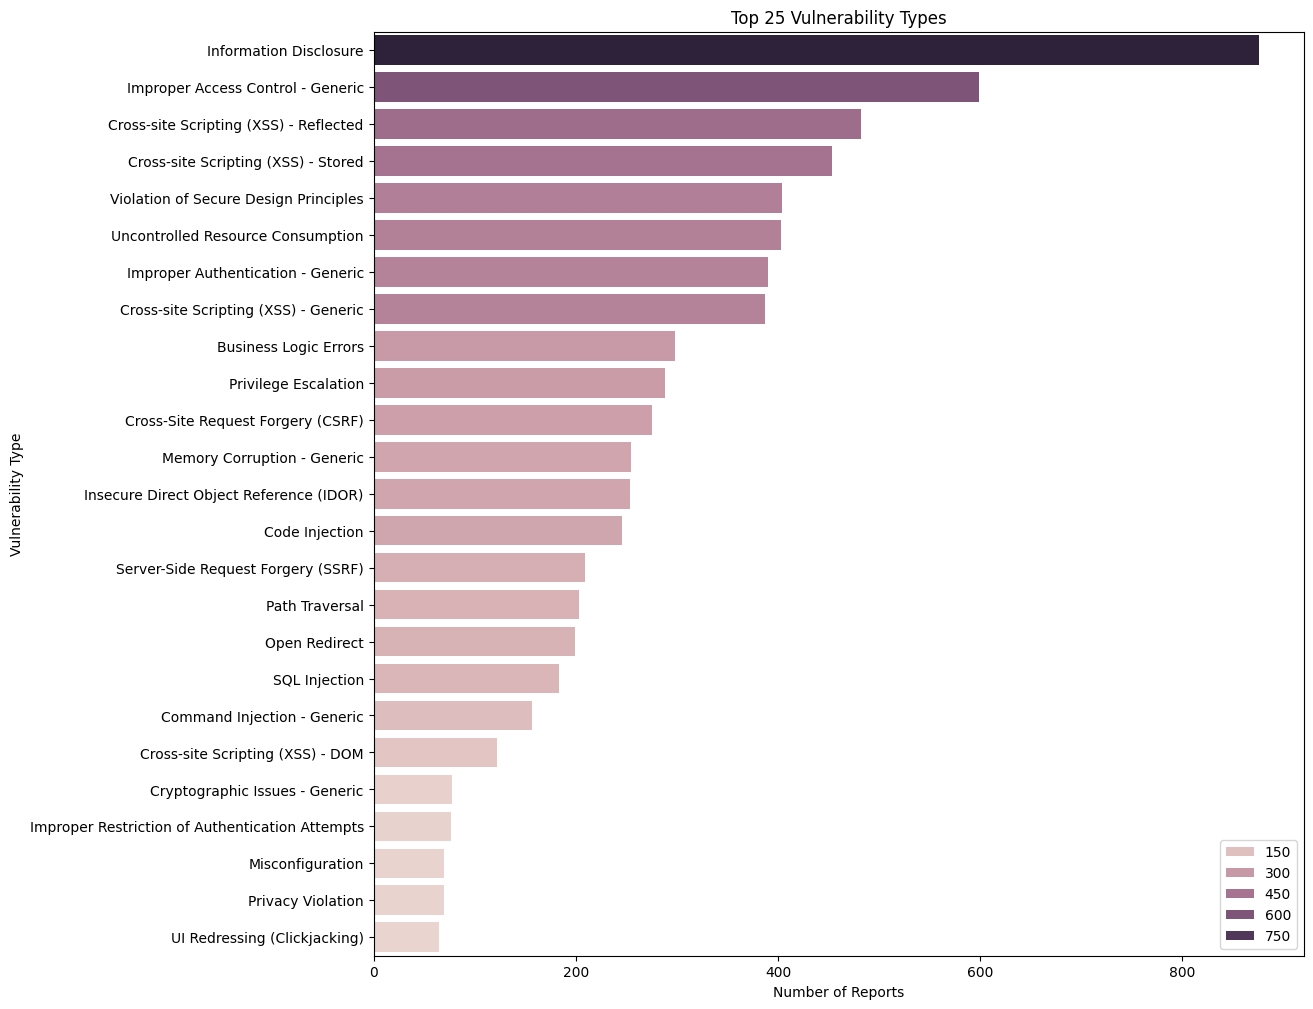

In [143]:
vuln_counts = df['vuln_type'].value_counts().head(25)
plt.figure(figsize=(12, 12))
sns.barplot(x=vuln_counts.values, y=vuln_counts.index, hue=vuln_counts.values)
plt.title('Top 25 Vulnerability Types')
plt.xlabel('Number of Reports')
plt.ylabel('Vulnerability Type')
plt.show()

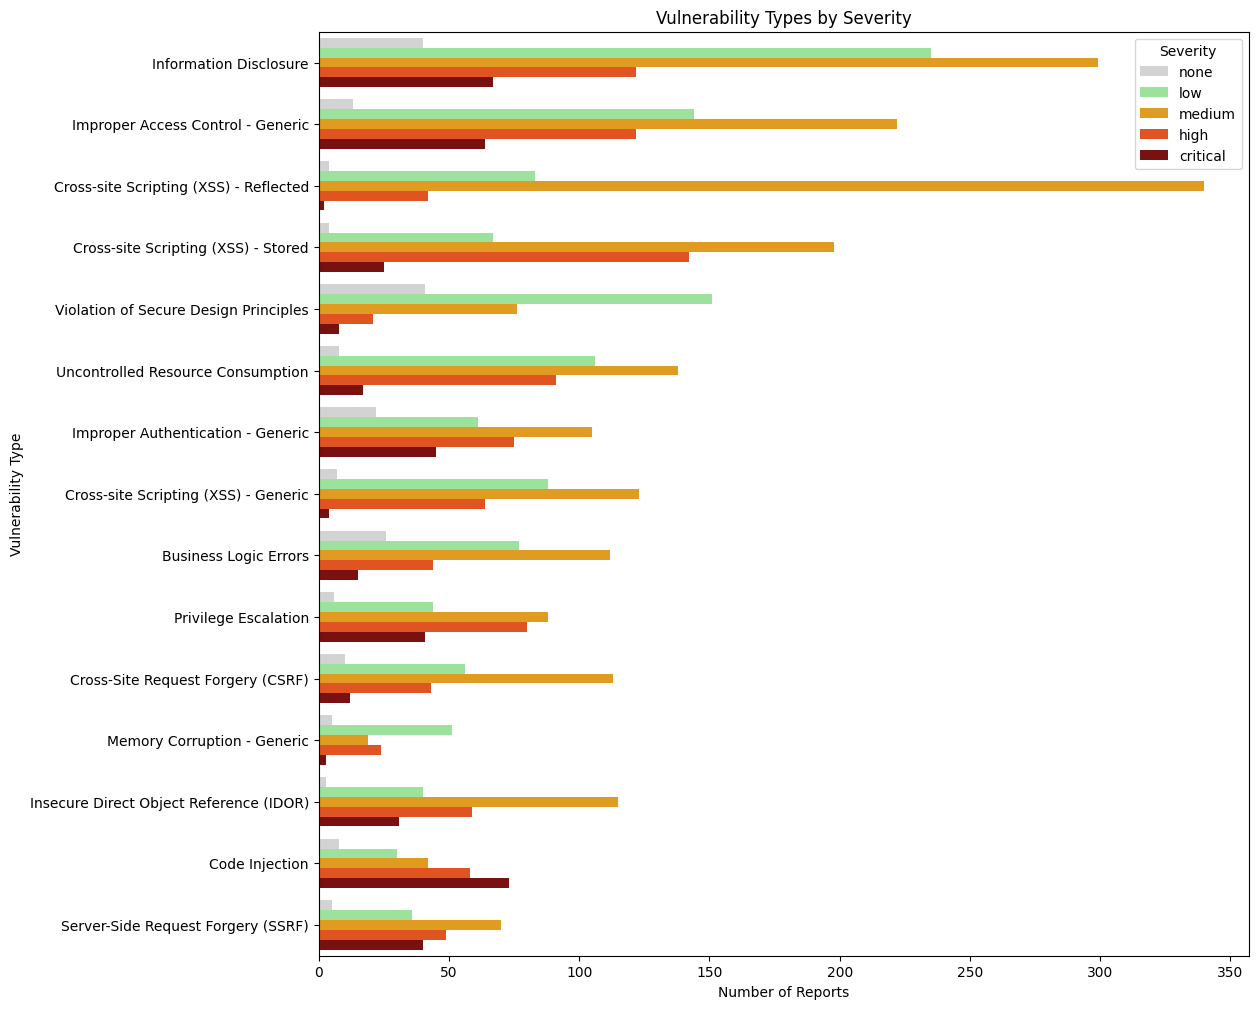

In [144]:
plt.figure(figsize=(12, 12))
severity_order = ['none', 'low', 'medium', 'high', 'critical']
color_palette = {
    'none': '#d3d3d3',
    'low': '#90ee90',
    'medium': '#ffa500',
    'high': '#ff4500',
    'critical': '#8b0000'
}
sns.countplot(
    data=df,
    y='vuln_type',
    hue='severity',
    order=df['vuln_type'].value_counts().index[:15],
    hue_order=severity_order,
    palette=color_palette
)
plt.title('Vulnerability Types by Severity')
plt.xlabel('Number of Reports')
plt.ylabel('Vulnerability Type')
plt.legend(title='Severity')
plt.show()

### Reporters

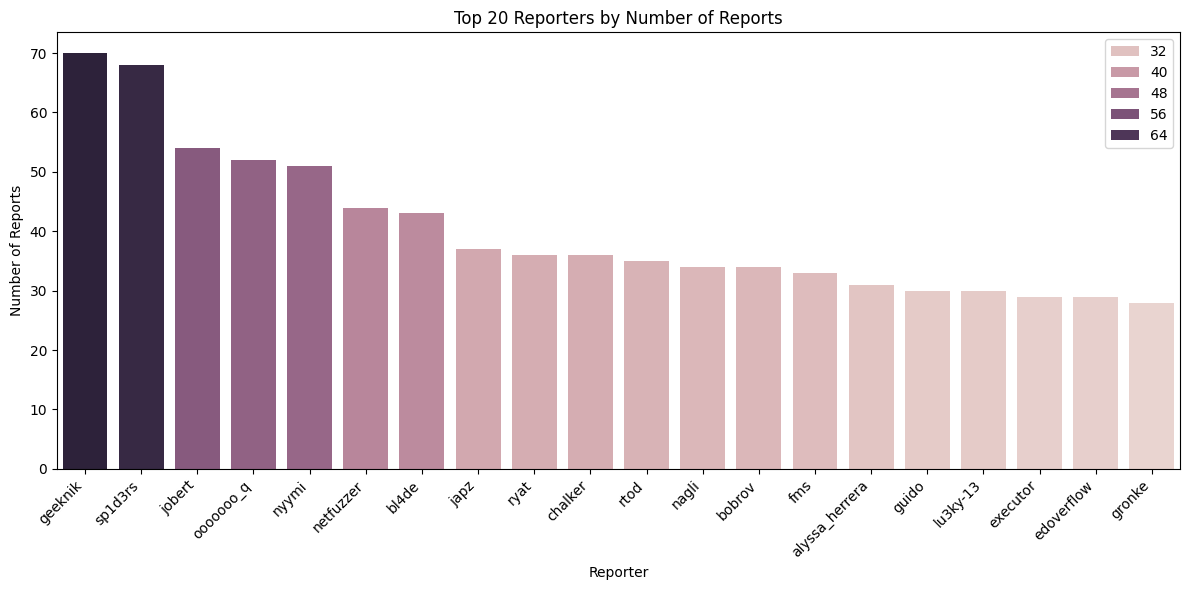

In [ ]:
top_n = 20
reporter_counts = df['reporter'].dropna().value_counts()
top_reporters = reporter_counts.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_reporters.index, y=top_reporters.values, hue=top_reporters.values)
plt.title(f'Top {top_n} Reporters by Number of Reports')
plt.xlabel('Reporter')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()